#### Part A: Basic EDA (Exploratory Data Analysis)

In [6]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as XGBoostClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans



In [7]:
#Loading the dataset into pandas
df=pd.read_csv(r"HRDataset_v14.csv") 

In [8]:
#Displaying the first five rows
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [9]:
#Checking the shape of the dataset- the number of rows and columns
df.shape #

(311, 36)

In [10]:
#Column names and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [11]:
#The number of unique values in each column
df.nunique(axis=0)

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [12]:
#Unique values per column without NaN values
df.nunique(axis=0, dropna=True)

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [13]:
#Identifying missing values in the dataset and listing columns with nulls
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [14]:
#Describing the numerical columns (five-number summary)
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


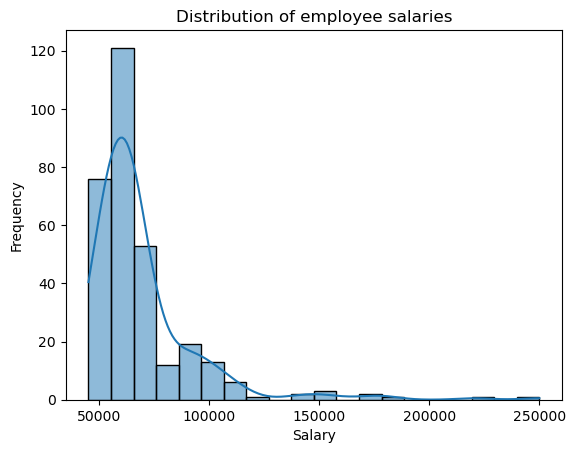

In [15]:
#Distribution of employee salaries
plt.Figure(figsize=(5, 9))
sns.histplot(df["Salary"], bins=20, kde=True, edgecolor='black')
plt.title("Distribution of employee salaries")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

In [16]:
# average age of employees

df['DOB']=pd.to_datetime(df["DOB"], format="%m/%d/%y")

#Year extraction
df["Year"] = df["DOB"].dt.year
df["Year"] = np.where(df["Year"] > 2025, df["Year"] - 100, df["Year"])
df["Age"] = 2025 - df["Year"]

# Finding the mean age 
mean_age=df["Age"].mean()
print(mean_age)

46.40836012861736


In [17]:
# Employees still employeed vs terminated
df["EmploymentStatus"].value_counts()

EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64

In [18]:
#Departments with the most employees

In [19]:
df["Department"].value_counts()

Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64

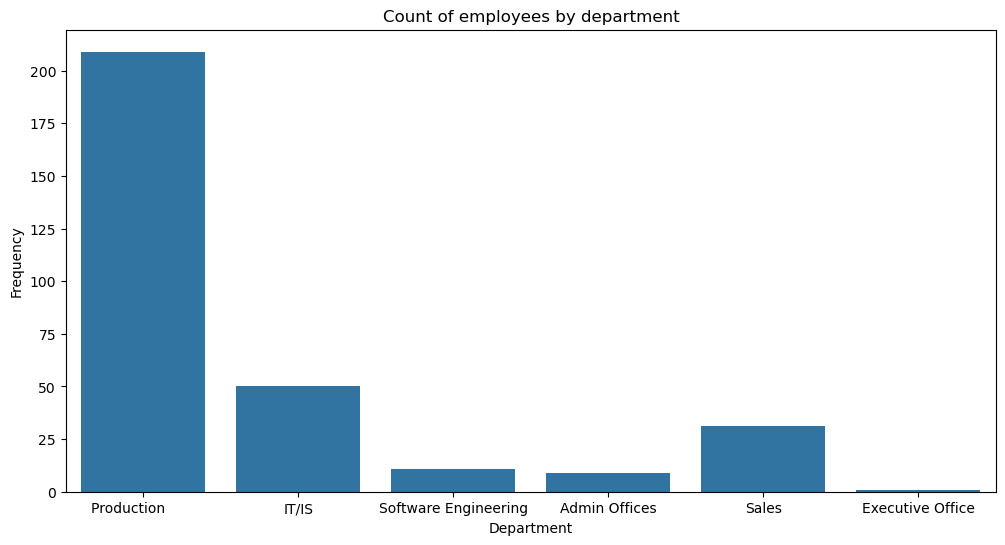

In [20]:
plt.figure(figsize=(12, 6))

sns.countplot (x='Department', data=df)

plt.title("Count of employees by department")
plt.xlabel("Department")
plt.ylabel("Frequency")
plt.show()

#### Part B: Business Analysis

In [21]:
#Average salary per department
average_salary_department= df.groupby("Department")["Salary"].mean().reset_index()
average_salary_department.columns = ["Department", "Salary Amount"]

print("The average salary per department is:")
print(average_salary_department)

The average salary per department is:
             Department  Salary Amount
0         Admin Offices   71791.888889
1      Executive Office  250000.000000
2                 IT/IS   97064.640000
3     Production          59953.545455
4                 Sales   69061.258065
5  Software Engineering   94989.454545


In [22]:
#Distribution of employment status
employment_status= df["EmploymentStatus"].value_counts()
print(employment_status)

EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64


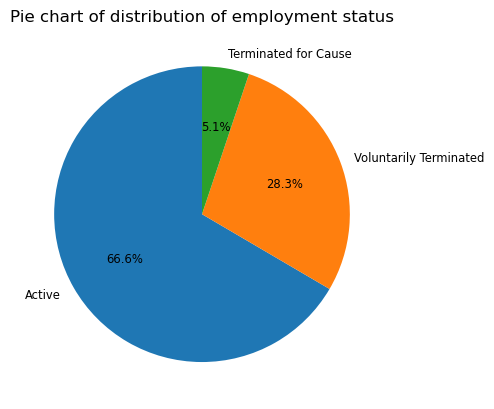

In [23]:
labels= ["Active", "Voluntarily Terminated", "Terminated for Cause"]
y=employment_status
fig, ax = plt.subplots()
ax.pie(y, labels=labels, autopct='%1.1f%%', startangle=90,
       textprops={'size':'smaller'})
plt.title("Pie chart of distribution of employment status")
plt.show()

In [24]:
#Salary levels between Male and Female employees
salary_levels= df.groupby("Sex")["Salary"].value_counts()
print(salary_levels)

Sex  Salary
F    57815     2
     61242     2
     45046     1
     45069     1
     45395     1
              ..
M    140920    1
     148999    1
     157000    1
     170500    1
     178000    1
Name: count, Length: 309, dtype: int64


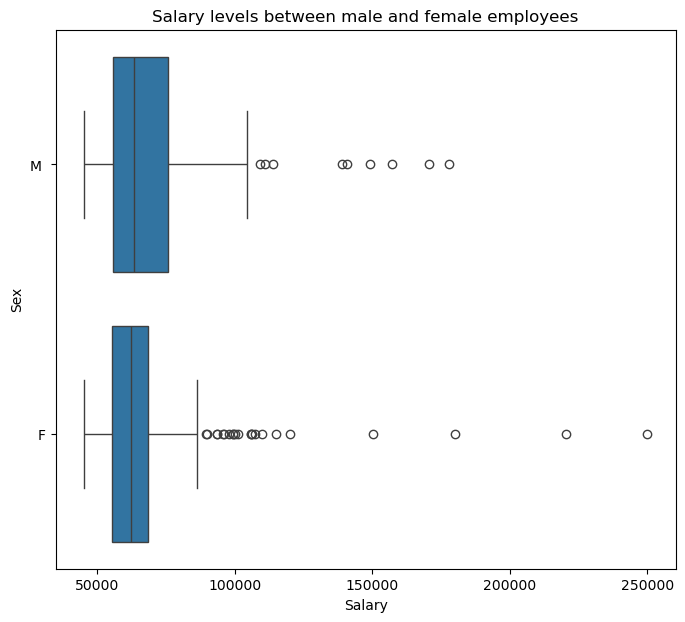

In [25]:
#Boxplot of salary vs gender
fig=plt.figure(figsize=(8, 7))
sns.boxplot(x="Salary", y="Sex", data=df)
plt.title("Salary levels between male and female employees")
plt.xlabel("Salary")
plt.ylabel("Sex")
plt.show()

In [26]:
#Recruitment source bringing in the most employees
recruitment_source= df["RecruitmentSource"].value_counts()

print("The number of employees recruited per source is:")
print(recruitment_source)

The number of employees recruited per source is:
RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64


In [27]:
#Percentage of of employees who attended a Diversity Job Fair
pct_job_fair_attended= df["FromDiversityJobFairID"].mean() * 100
print(pct_job_fair_attended)

9.32475884244373


In [28]:
#Engagement survey scores across different departments
survey_score_by_department= df.groupby("Department")["EngagementSurvey"].value_counts()
print(survey_score_by_department)

Department            EngagementSurvey
Admin Offices         5.00                4
                      3.24                1
                      3.80                1
                      3.90                1
                      4.10                1
                                         ..
Software Engineering  4.15                1
                      4.20                1
                      4.60                1
                      4.96                1
                      5.00                1
Name: count, Length: 163, dtype: int64


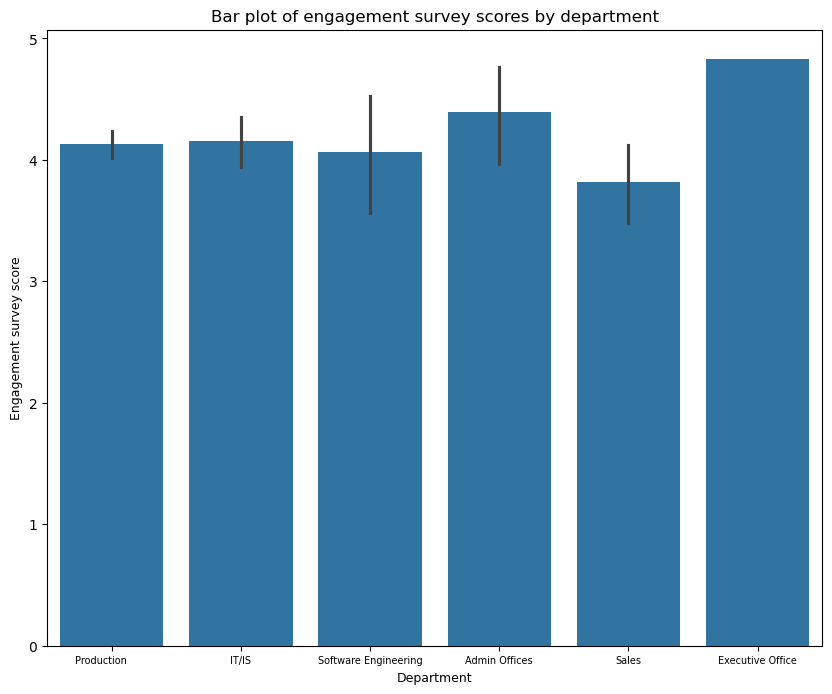

In [29]:
fig=plt.figure(figsize=(10, 8))
ax=sns.barplot(x="Department", y="EngagementSurvey", data=df)
plt.title("Bar plot of engagement survey scores by department")
plt.xlabel("Department", fontsize=9)
plt.ylabel("Engagement survey score", fontsize=9)
ax.tick_params(axis="x", labelsize=7)
plt.show()

In [30]:
#Race with the highest average salary
racial_salary_analysis=df.groupby("RaceDesc")["Salary"].mean()
print(f"The average salary by racial group is")
print(racial_salary_analysis)

The average salary by racial group is
RaceDesc
American Indian or Alaska Native    65806.000000
Asian                               68521.206897
Black or African American           74431.025000
Hispanic                            83667.000000
Two or more races                   59998.181818
White                               67287.545455
Name: Salary, dtype: float64


In [31]:
pd.set_option('display.max_columns', 100)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

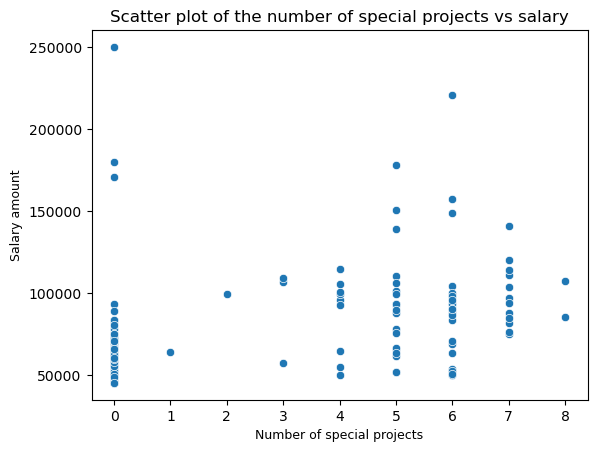

In [32]:
#Scatterplot showing the relationship between number of projects (SpecialProjectsCount) and salary

sns.scatterplot(data=df, x="SpecialProjectsCount", y="Salary")
plt.title("Scatter plot of the number of special projects vs salary")
plt.xlabel("Number of special projects", fontsize=9)
plt.ylabel("Salary amount", fontsize=9)
plt.show()

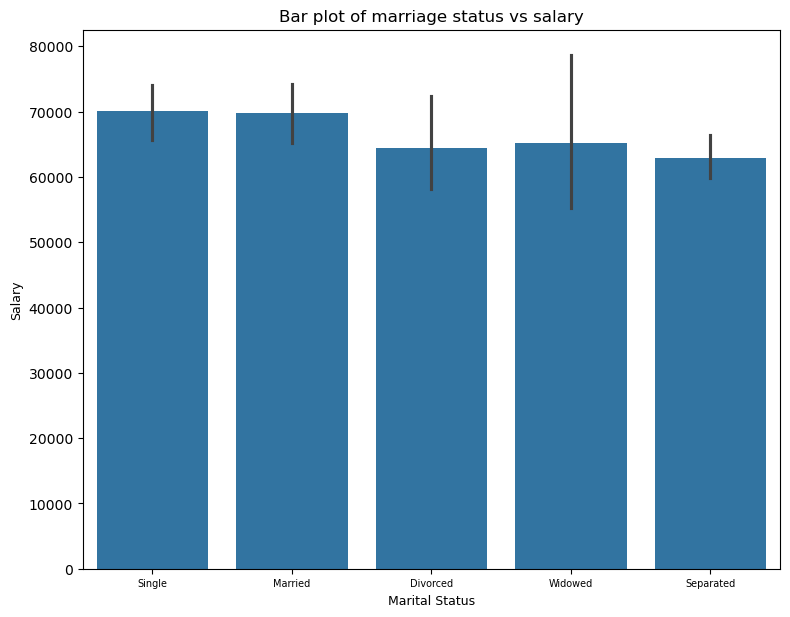

In [33]:
#Salaries of married employees vs single employees
fig=plt.figure(figsize=(9,7))
ax=sns.barplot(x=df["MaritalDesc"], y=df["Salary"], data=df)
plt.title("Bar plot of marriage status vs salary")
plt.xlabel("Marital Status", fontsize=9)
plt.ylabel("Salary", fontsize=9)
ax.tick_params(axis="x", labelsize=7)

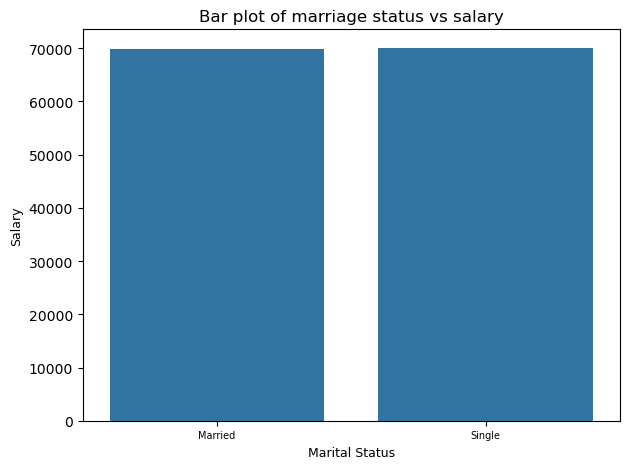

In [34]:
#Filtering out only the Single and Married categories from the marital description column
selected_marital_statuses=['Single', 'Married']
filtered_df=df[df['MaritalDesc'].isin(selected_marital_statuses)]
#Finding the mean of the filtered groups
mean_salary_marriage_status=filtered_df.groupby("MaritalDesc")["Salary"].mean().reset_index()

ax=sns.barplot(x='MaritalDesc', y='Salary', data=mean_salary_marriage_status)

plt.title("Bar plot of marriage status vs salary")
plt.xlabel("Marital Status", fontsize=9)
plt.ylabel("Salary", fontsize=9)
ax.tick_params(axis="x", labelsize=7)

plt.tight_layout()
plt.show()


In [35]:
#Managers with the largest teams
df.groupby("ManagerName").size()

ManagerName
Alex Sweetwater        9
Amy Dunn              21
Board of Directors     2
Brandon R. LeBlanc     7
Brannon Miller        22
Brian Champaigne       8
David Stanley         21
Debra Houlihan         3
Elijiah Gray          22
Eric Dougall           4
Janet King            19
Jennifer Zamora        7
John Smith            14
Kelley Spirea         22
Ketsia Liebig         21
Kissy Sullivan        22
Lynn Daneault         13
Michael Albert        22
Peter Monroe          14
Simon Roup            17
Webster Butler        21
dtype: int64

#### Part C: Data Visualization


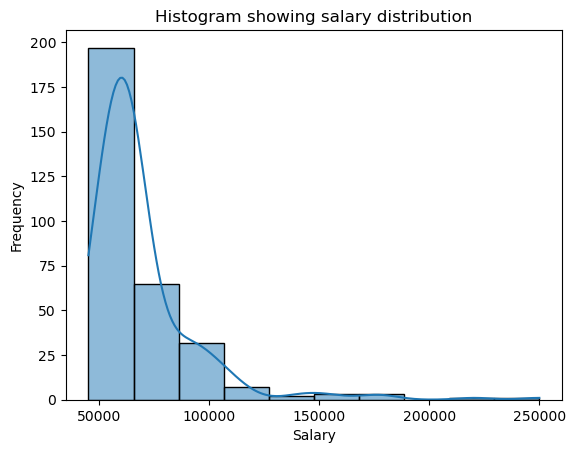

In [36]:
#Distribution of salary using a histogram

sns.histplot(df["Salary"], bins=10, kde=True)
plt.title("Histogram showing salary distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

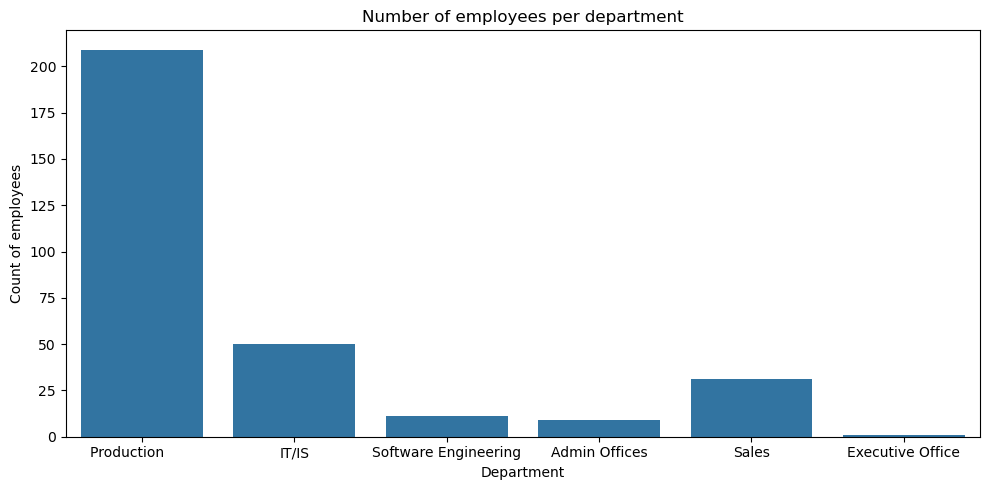

In [37]:
#Count of employees by department
plt.figure(figsize=(10, 5))
sns.countplot(x="Department", data=df)
plt.title("Number of employees per department")
plt.xlabel("Department", fontsize=10)
plt.ylabel("Count of employees", fontsize=10)
plt.tight_layout()
plt.show()

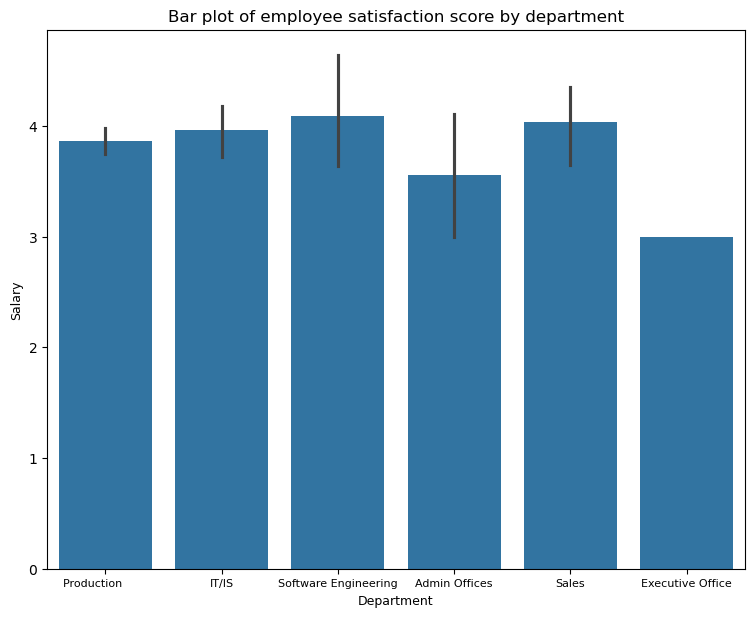

In [38]:
#Average satisfaction by department

average_emp_satisfaction=df.groupby("Department")["EmpSatisfaction"].mean()

fig=plt.figure(figsize=(9,7))
ax=sns.barplot(x=df["Department"], y=df["EmpSatisfaction"], data=df)
plt.title("Bar plot of employee satisfaction score by department")
plt.xlabel("Department", fontsize=9)
plt.ylabel("Salary", fontsize=9)
ax.tick_params(axis="x", labelsize=8)

In [39]:
print("\nAverage Employee Satisfaction:")
print(average_emp_satisfaction)


Average Employee Satisfaction:
Department
Admin Offices           3.555556
Executive Office        3.000000
IT/IS                   3.960000
Production              3.861244
Sales                   4.032258
Software Engineering    4.090909
Name: EmpSatisfaction, dtype: float64


In [40]:
#Employee terminations over time
#Changing termination dates to datetime
df["DateTermination"]=pd.to_datetime(df["DateofTermination"])
df["DateTermination"]

0            NaT
1     2016-06-16
2     2012-09-24
3            NaT
4     2016-09-06
         ...    
306          NaT
307   2015-09-29
308          NaT
309          NaT
310          NaT
Name: DateTermination, Length: 311, dtype: datetime64[ns]

In [41]:
#Sorting termination dates into months
monthly_terminations=df.groupby(df["DateTermination"].dt.to_period("M")).size()


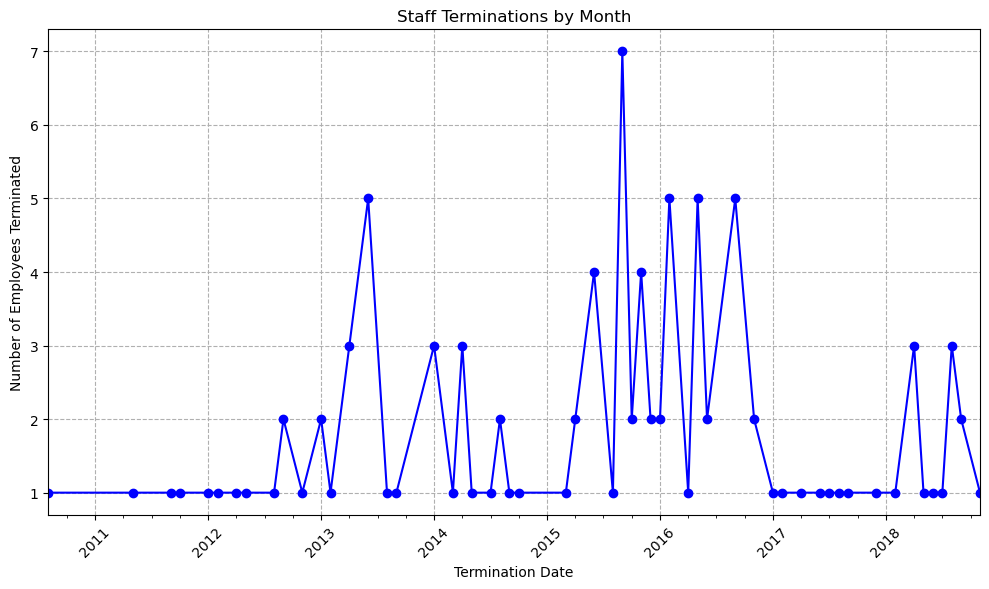

In [42]:
#Line plot showing terminations over time (by months)
plt.figure(figsize=(10, 6))
monthly_terminations.plot(kind='line', marker='o', color='blue')

plt.title('Staff Terminations by Month')
plt.xlabel('Termination Date')
plt.ylabel('Number of Employees Terminated')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

In [43]:
#Average salary by gender using a boxplot
average_salary_gender= df.groupby("Sex")["Salary"].mean()
print(average_salary_gender)

Sex
F     67786.727273
M     70629.400000
Name: Salary, dtype: float64


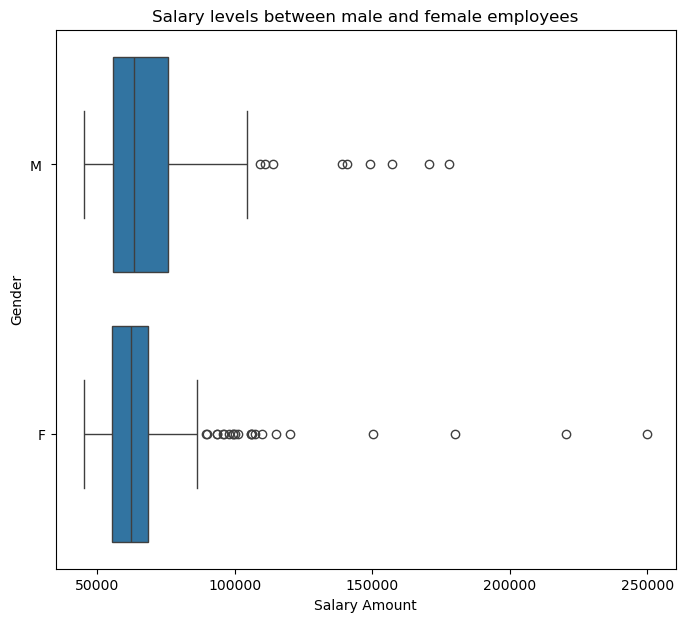

In [44]:
fig=plt.figure(figsize=(8, 7))
sns.boxplot(x="Salary", y="Sex", data=df)
plt.title("Salary levels between male and female employees")
plt.xlabel("Salary Amount")
plt.ylabel("Gender")
plt.show()

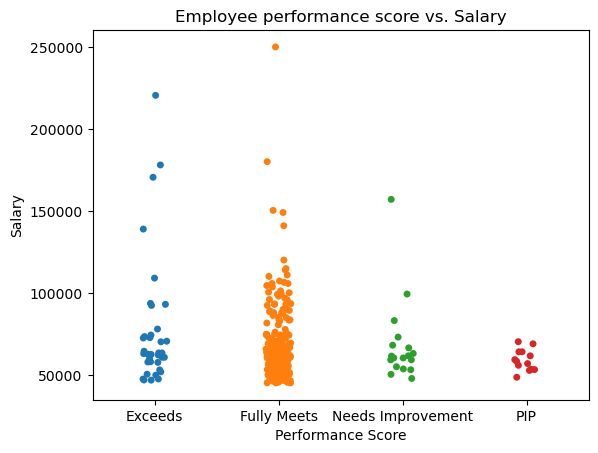

In [45]:
#Performance scores vs salary

sns.stripplot(data=df, x="PerformanceScore", y="Salary", hue="PerformanceScore")
plt.title("Employee performance score vs. Salary")
plt.xlabel("Performance Score", fontsize=10)
plt.ylabel("Salary", fontsize=10)
plt.show()

In [46]:
#Correlations between numeric variables
numeric_cols = df.select_dtypes(include='number')
print(numeric_cols)

     EmpID  MarriedID  MaritalStatusID  GenderID  EmpStatusID  DeptID  \
0    10026          0                0         1            1       5   
1    10084          1                1         1            5       3   
2    10196          1                1         0            5       5   
3    10088          1                1         0            1       5   
4    10069          0                2         0            5       5   
..     ...        ...              ...       ...          ...     ...   
306  10135          0                0         1            1       5   
307  10301          0                0         0            5       5   
308  10010          0                0         0            1       3   
309  10043          0                0         0            1       3   
310  10271          0                4         0            1       5   

     PerfScoreID  FromDiversityJobFairID  Salary  Termd  PositionID   Zip  \
0              4                       0   625

In [47]:
numeric_cols_correlation = numeric_cols.corr()
print("\nCorrelation Matrix:")
print(numeric_cols_correlation)


Correlation Matrix:
                           EmpID  MarriedID  MaritalStatusID  GenderID  \
EmpID                   1.000000   0.048058        -0.043851  0.035914   
MarriedID               0.048058   1.000000         0.164044 -0.024199   
MaritalStatusID        -0.043851   0.164044         1.000000 -0.030236   
GenderID                0.035914  -0.024199        -0.030236  1.000000   
EmpStatusID             0.073750   0.085619         0.114630 -0.032440   
DeptID                  0.107406  -0.119932         0.012768 -0.038838   
PerfScoreID            -0.691348  -0.058362         0.044693 -0.054915   
FromDiversityJobFairID  0.046805  -0.012708         0.041117  0.031493   
Salary                 -0.115319   0.026165        -0.070291  0.056097   
Termd                   0.092389   0.077028         0.099367 -0.015741   
PositionID             -0.036488  -0.027334         0.021923 -0.081612   
Zip                     0.026858  -0.041147         0.010620  0.048539   
ManagerID        

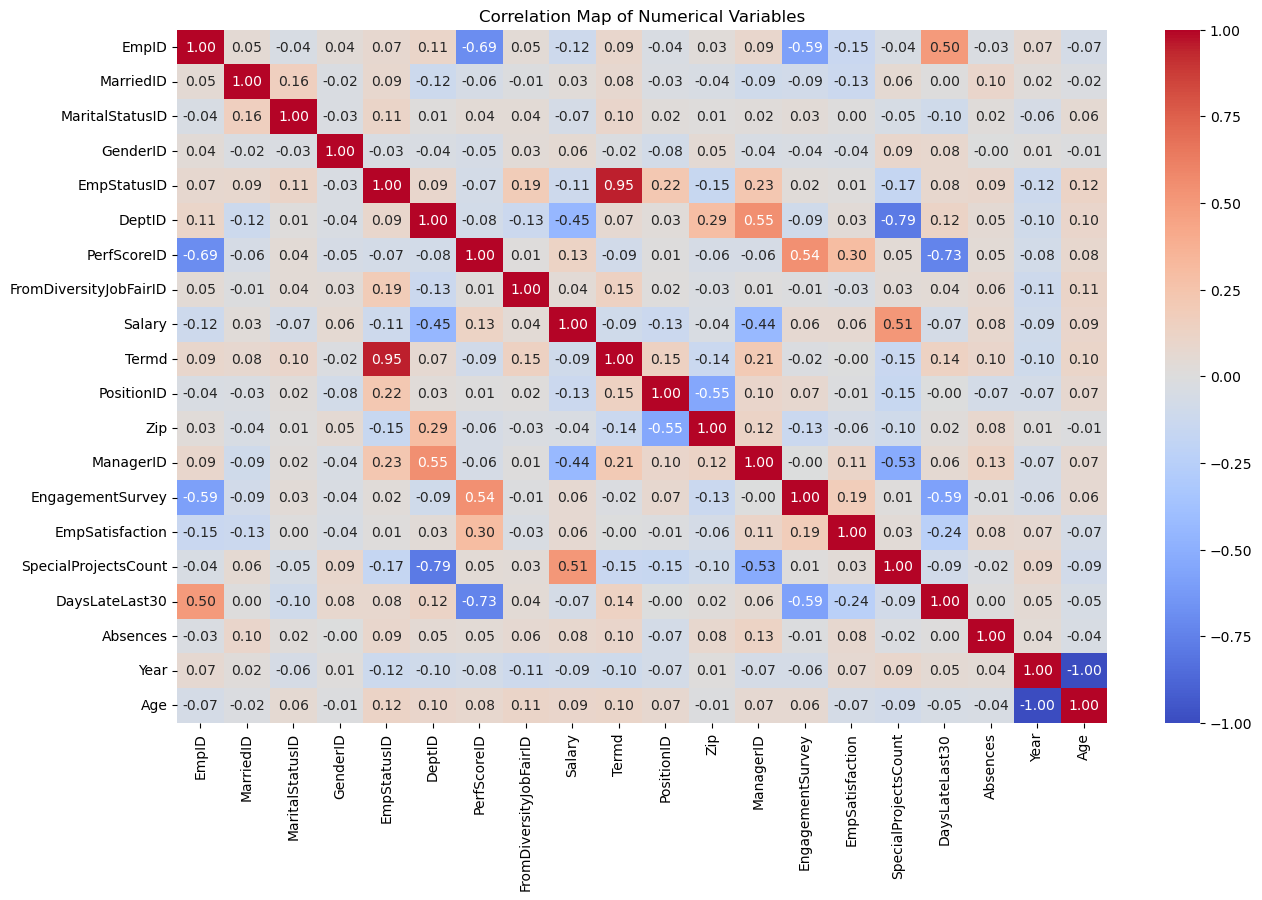

In [48]:
plt.figure(figsize=(15, 9))
sns.heatmap(numeric_cols_correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Map of Numerical Variables")
plt.show()

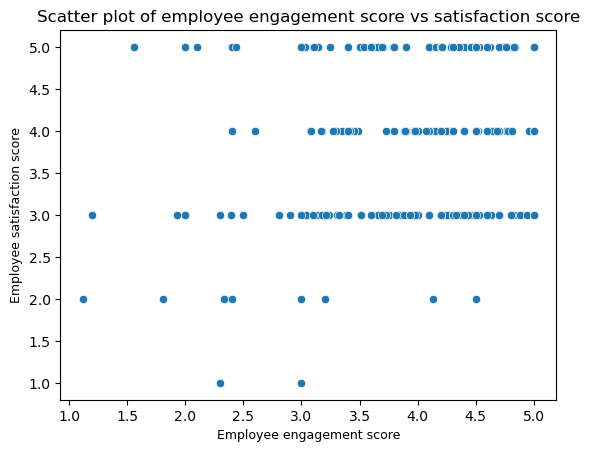

In [49]:
#Engagement survey score vs satisfaction score

sns.scatterplot(data=df, x="EngagementSurvey", y="EmpSatisfaction")
plt.title("Scatter plot of employee engagement score vs satisfaction score")
plt.xlabel("Employee engagement score", fontsize=9)
plt.ylabel("Employee satisfaction score", fontsize=9)
plt.show()

In [50]:
# Compaering employees' employment status by department
status_by_department=df.groupby("Department")["EmploymentStatus"].value_counts()
print(status_by_department)

Department            EmploymentStatus      
Admin Offices         Active                      7
                      Terminated for Cause        1
                      Voluntarily Terminated      1
Executive Office      Active                      1
IT/IS                 Active                     40
                      Voluntarily Terminated      6
                      Terminated for Cause        4
Production            Active                    126
                      Voluntarily Terminated     75
                      Terminated for Cause        8
Sales                 Active                     26
                      Voluntarily Terminated      3
                      Terminated for Cause        2
Software Engineering  Active                      7
                      Voluntarily Terminated      3
                      Terminated for Cause        1
Name: count, dtype: int64


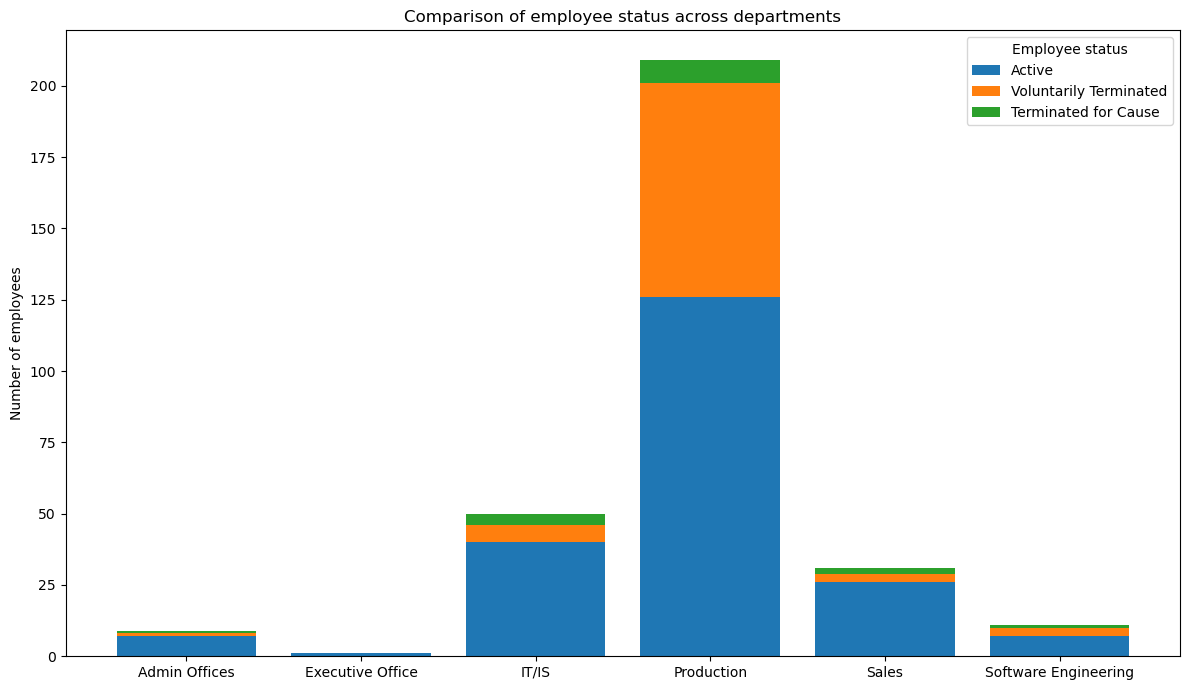

In [51]:
# Plotting the employee status across departments using a stacked bar chart
# X-axis
#Creating the array to use for the bar chart using the results from the groupby function producing the employee status by department
departments = ["Admin Offices", "Executive Office", "IT/IS", "Production", "Sales", "Software Engineering"]
employment_statuses = {
    'Active': np.array([7, 1, 40, 126, 26, 7]),
    'Voluntarily Terminated': np.array([1, 0, 6, 75, 3, 3]),
    'Terminated for Cause': np.array([1, 0, 4, 8, 2, 1])
}

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
bottom = np.zeros(len(departments))

for status, count in employment_statuses.items():
    p = ax.bar(departments, count, label=status, bottom=bottom)
    bottom += count
    labels = [c if c > 0 else '' for c in count]
   
ax.set_title("Comparison of employee status across departments")
ax.set_ylabel("Number of employees")
ax.legend(title="Employee status", loc='upper right')
plt.tight_layout()
plt.show()

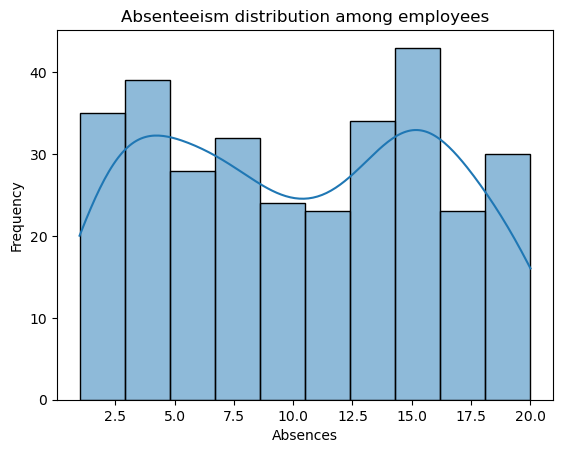

In [52]:
#Absenteeism distribution among employees
sns.histplot(df["Absences"], bins=10, kde=True)
plt.title("Absenteeism distribution among employees")
plt.xlabel("Absences")
plt.ylabel("Frequency")
plt.show()

In [53]:
#Confirming the maximum and minimum values in the absences column
max_absences= df["Absences"].max()
min_absences= df["Absences"].min()

print(max_absences)
print(min_absences)

20
1


### Part D: PCA (Dimensionality Reduction)

In [54]:
#Standardizing numerical features before applying PCA
#Defining numerical columns and dropping missing values
numerical_columns=numeric_cols.dropna()

scaler=StandardScaler()
X_scaled=scaler.fit_transform(numerical_columns)


In [55]:
#Performing PCA on the dataset and explain the first 2 components
pca=PCA(n_components=2)
X_pca=(pca.fit_transform(X_scaled))

#Storing the results into a dataframe
X_pca_df=pd.DataFrame(data=X_pca, columns=["PCA1", "PCA2"])
X_pca_df.head()


,PCA1,PCA2
0,1.452920,1.199781
1,1.785489,0.009603
2,-1.674846,0.088078
3,0.815653,0.273204
4,-1.015841,2.371923


In [56]:
X_pca_df.tail()

,PCA1,PCA2
298,0.074539,-0.148321
299,-4.754213,-2.274425
300,5.408635,-1.661960
301,2.823044,-1.315676
302,-0.189904,0.663568


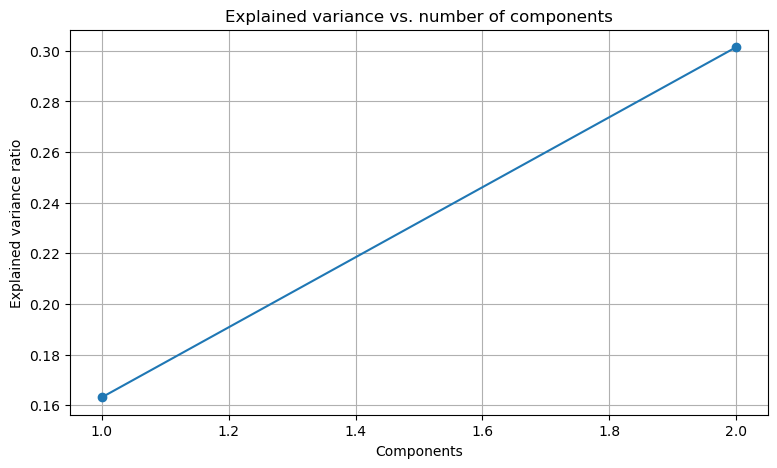

In [ ]:
#Plotting the explained variance ratio for the PCA components using a cumulative variance plot

plt.figure(figsize=(9, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Components")
plt.ylabel("Explained variance ratio")
plt.title("Explained variance vs. number of components")
plt.grid(True)
plt.show()

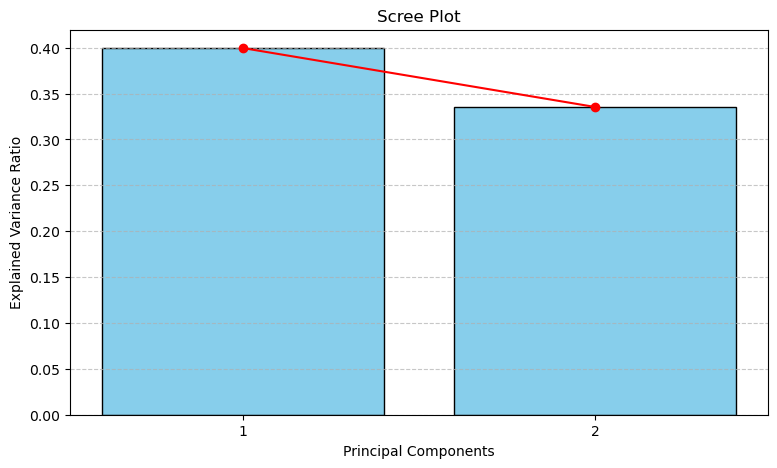

In [69]:
# Scree plot
plt.figure(figsize=(9, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color="skyblue", edgecolor="black")
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker="o", color="red")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.show()


In [58]:
#Reducing the dataset to 2 dimensions with PCA (Employees by department) and plotting using a scatterplot

#Extracting department values in the original dataframe that align with X_pca_df index
X_pca_df["Department"] = df.loc[X_pca_df.index, "Department"]

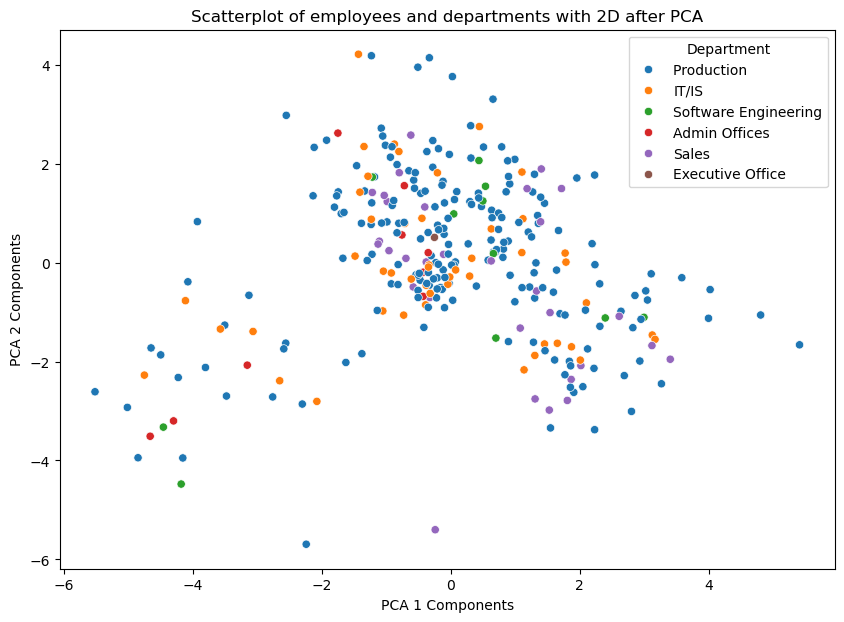

In [59]:
#Scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=X_pca_df, x="PCA1", y="PCA2", hue="Department")
plt.xlabel("PCA 1 Components")
plt.ylabel("PCA 2 Components")
plt.title("Scatterplot of employees and departments with 2D after PCA")
plt.show()

In [60]:
# Identifying the variables contributing the most to the first principale component

pca1_loading = pd.DataFrame(pca.components_.T, columns=["PCA1", "PCA2"],
    index=numerical_columns.columns)

pca1_variables = pca1_loading["PCA1"].abs().sort_values(ascending=False)

print("Variables contributing most to PCA1:")
print(pca1_variables)

Variables contributing most to PCA1:
PerfScoreID               0.383291
DaysLateLast30            0.368461
EmpID                     0.354513
DeptID                    0.326306
EngagementSurvey          0.319976
SpecialProjectsCount      0.318198
ManagerID                 0.285472
Salary                    0.280979
Termd                     0.217200
EmpStatusID               0.210601
EmpSatisfaction           0.137041
Zip                       0.073112
PositionID                0.056380
FromDiversityJobFairID    0.022246
Absences                  0.022077
Year                      0.021135
Age                       0.021135
MarriedID                 0.016203
MaritalStatusID           0.010130
GenderID                  0.004274
Name: PCA1, dtype: float64


In [61]:
#Applying PCA to engagement, satisfaction and absences. Do they condense into 1 dimension?

#Selecting the engagement, employee satisfaction and absences before scaling and fitting.
X1=df[["EngagementSurvey", "EmpSatisfaction", "Absences"]]

#Standardizing the data using standard scaler
scaled=StandardScaler()
X1_scaled=scaled.fit_transform(X1)

In [62]:
#Performing PCA on the three features - engagement, employee satisfaction and absences 
pca=PCA(n_components=2)
X1_pca= pca.fit(X1_scaled)
print(f"Variance explained by PC1:", X1_pca.explained_variance_ratio_[0])

Variance explained by PC1: 0.3995832823586917


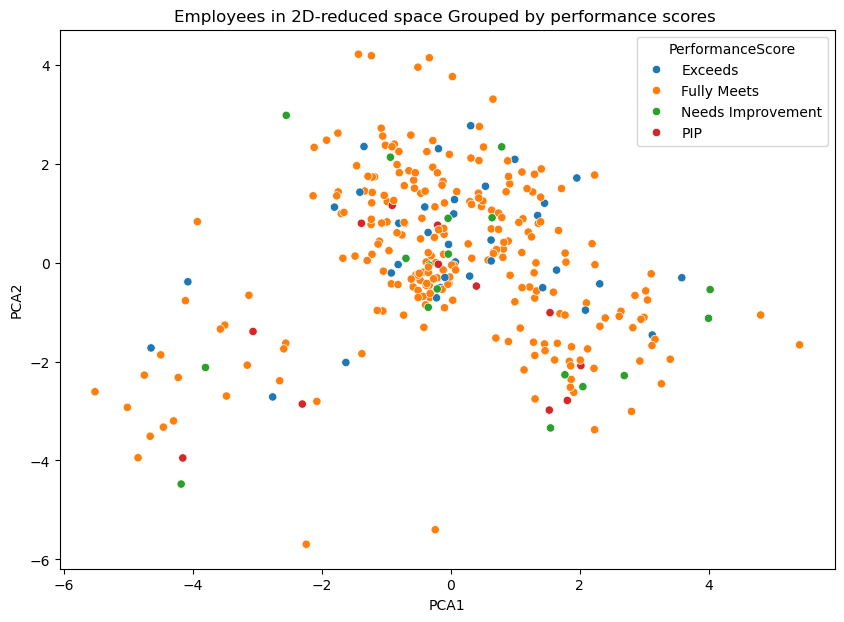

In [63]:
#Visualizing employees in PCA-reduced 2D space grouped by Performance
X_pca_df['PerformanceScore'] = df.loc[X_pca_df.index, 'PerformanceScore']


#plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=X_pca_df, x="PCA1", y="PCA2", hue='PerformanceScore')
plt.title("Employees in 2D-reduced space Grouped by performance scores ")
plt.show()

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score (Original Data): 0.187
Silhouette Score (PCA Data): 0.494
Adjusted Rand Index (ARI): 0.932


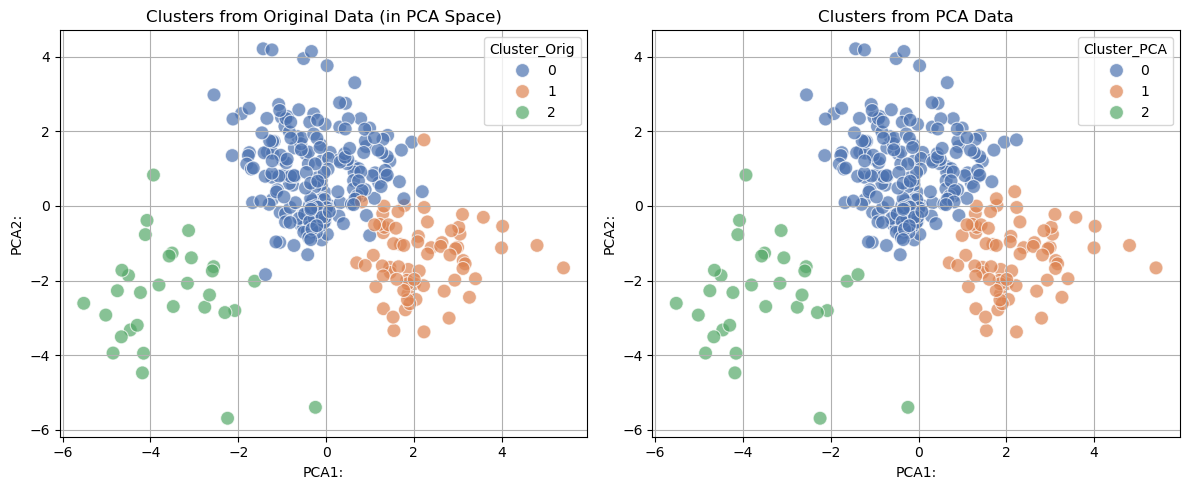

In [66]:
#Clustering before vs after PCA using k-means on numerical data

# K-means clustering on original data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)
silhouette_orig = silhouette_score(X_scaled, labels_orig)

# K-means clustering on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca_df[["PCA1", "PCA2"]])
silhouette_pca = silhouette_score(X_pca_df[["PCA1", "PCA2"]], labels_pca)

# Comparing clustering
ari = adjusted_rand_score(labels_orig, labels_pca)

# Print results
print(f"Silhouette Score (Original Data): {silhouette_orig:.3f}")
print(f"Silhouette Score (PCA Data): {silhouette_pca:.3f}")
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

# Visualizing clusters in PCA space
X_pca_df["Cluster_Orig"] = labels_orig
X_pca_df["Cluster_PCA"] = labels_pca

plt.figure(figsize=(12, 5))

# Plot 1: Clusters from original data
plt.subplot(1, 2, 1)
sns.scatterplot(data=X_pca_df, x="PCA1", y="PCA2", hue="Cluster_Orig", palette="deep", s=100, alpha=0.7)
plt.title("Clusters from Original Data (in PCA Space)")
plt.xlabel("PCA1:")
plt.ylabel("PCA2:")
plt.grid(True)

# Plot 2: Clusters from PCA data
plt.subplot(1, 2, 2)
sns.scatterplot(data=X_pca_df, x="PCA1", y="PCA2", hue="Cluster_PCA", palette="deep", s=100, alpha=0.7)
plt.title("Clusters from PCA Data")
plt.xlabel("PCA1:")
plt.ylabel("PCA2:")
plt.grid(True)

plt.tight_layout()
plt.show()

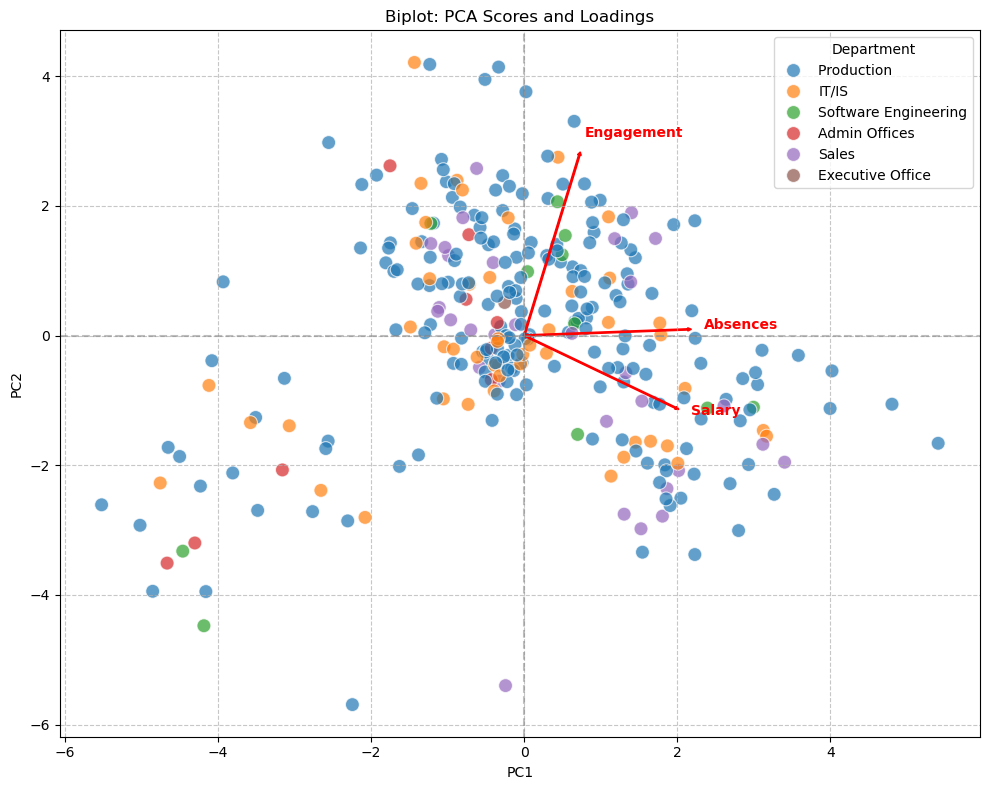

                 PC1       PC2
Salary      0.659712 -0.371955
Absences    0.712038  0.031431
Engagement  0.240378  0.927719


In [ ]:
#Plotting the loadings of salary, absences, and engagement on the first 2 PCs

# Features and loadings
features = ["Salary", "Absences", "Engagement"]
loadings = pd.DataFrame(pca.components_[:2].T, index=features, columns=["PC1", "PC2"])

# Scale loadings for visibility
scale = 3
loadings_scaled = loadings * scale

# Biplot
plt.figure(figsize=(10, 8))

# Plot PCA scores colored by Department
if "Department" in df.columns:
    X_pca_df["Department"] = df["Department"]
    sns.scatterplot(data=X_pca_df, x="PCA1", y="PCA2", hue="Department", s=100, alpha=0.7)
else:
    sns.scatterplot(data=X_pca_df, x="PCA1", y="PCA2", s=100, alpha=0.7)

# Plot loading vectors and labels
for feature, (x, y) in loadings_scaled.iterrows():
    plt.arrow(0, 0, x, y, color="red", width=0.02, head_width=0.05, head_length=0.05)
    plt.text(x * 1.1, y * 1.1, feature, fontsize=10, color="red", weight="bold")

# Axes and style
plt.axhline(0, color="gray", linestyle="--", alpha=0.5)
plt.axvline(0, color="gray", linestyle="--", alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot: PCA Scores and Loadings")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Show loadings
print(loadings)

#### When it is appropriate to use PCA in HR Analytics
- When HR managers want to understand the elements or variables of their dataset explaining the most variation of the said dataset.
- Focusing on identifying the weight of specific metrics in the dataset rather than applying clustering where the analysis reveals the different groups in the dataset.
- Where there is interest in reducing the dataset for objectivity in understanding the key aspects of data. PCA reduces the dimensions of the data, helping analysts to identify the key issues relevant to their analysis.
- Unlike clustering, PCA eliminates collinearity which helps reduce skewness of the data that can change the insights someone draws from analysis.
    